In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from moviepy.editor import VideoFileClip, clips_array, vfx
import seaborn as sns
from datascience import *
import xml.etree.ElementTree as et
from keras.models import load_model
from keras.preprocessing import sequence
import jieba
import json

In [17]:
xtree = et.parse("data/Outlast.xml")
xroot = xtree.getroot()

In [18]:
model = load_model("model/review_posneg_classifier.h5")
with open('model/index_dict.json', encoding='utf-8') as f:
    index_dict = json.load(f)

c:\users\11956\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [19]:
def getWeight(sentence):
    sen = []
    words = jieba.lcut(sentence)
    if len(words) >= 25:
        words = words[0:25]
    seen = 0
    unseen = 0
    for w in words:
        try:
            sen.append(index_dict[w])
            seen += 1
        except:
            sen.append(0)
            unseen += 1
    input = sequence.pad_sequences(np.array([sen]), maxlen=25)
    output = model.predict(input)
    score = (-output[0][0] + output[0][1]) * seen / (seen + unseen)
    return score
        

In [20]:
df_cols = ["time", "text"]
rows = []
for node in xroot:
    if node.tag == "d":
        time = float(node.attrib.get("p").split(",")[0])
        txt = node.text
        rows.append({"time": time, "text": txt})

df = pd.DataFrame(rows, columns=df_cols)
df["text"] = df["text"].str.replace(r"([a-zA-Z0-9])\1{3,}", lambda m: m.group(0)[:3])
df["value"] = df["text"].apply(getWeight)

df.head(40)

,time,text,value
0,4.962,见基滚,-0.172976
1,119.095,没字幕看不懂 肥了重看一遍,0.454171
2,0.000,视频重传了，弹幕不见了……谁知道怎么找回（/TДT)/,0.249904
3,13.982,这是谁,-0.397983
4,664.778,fuck me,-0.564758
5,54.966,弹幕呢,0.693480
6,0.000,弹幕能找回吗Q口Q,-0.888349
7,0.000,好可惜,0.541063
8,16.457,高能都不见了Q口Q,-0.904717
9,22.851,大哭！！！！,0.935993


In [33]:
df['second'] = df['time'].apply(lambda f: int(f // 4) * 4)
df.head()

,time,text,value,second
0,4.962,见基滚,-0.172976,4
1,119.095,没字幕看不懂 肥了重看一遍,0.454171,116
2,0.000,视频重传了，弹幕不见了……谁知道怎么找回（/TДT)/,0.249904,0
3,13.982,这是谁,-0.397983,12
4,664.778,fuck me,-0.564758,664


In [34]:
counts = df['value'].groupby(df['second']).count()
counts.head()

second
0     32
4     21
8     32
12    21
16    42
Name: value, dtype: int64

In [35]:
sums = df['value'].groupby(df['second']).sum()
sums.head()

second
0     5.990111
4     3.376054
8     6.769298
12    5.141458
16    6.067074
Name: value, dtype: float64

In [38]:
print(list(range(0,len(counts)*4,4)))
print(list(counts))
print(list(sums))

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 700, 704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752, 756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804, 808, 812, 816, 82

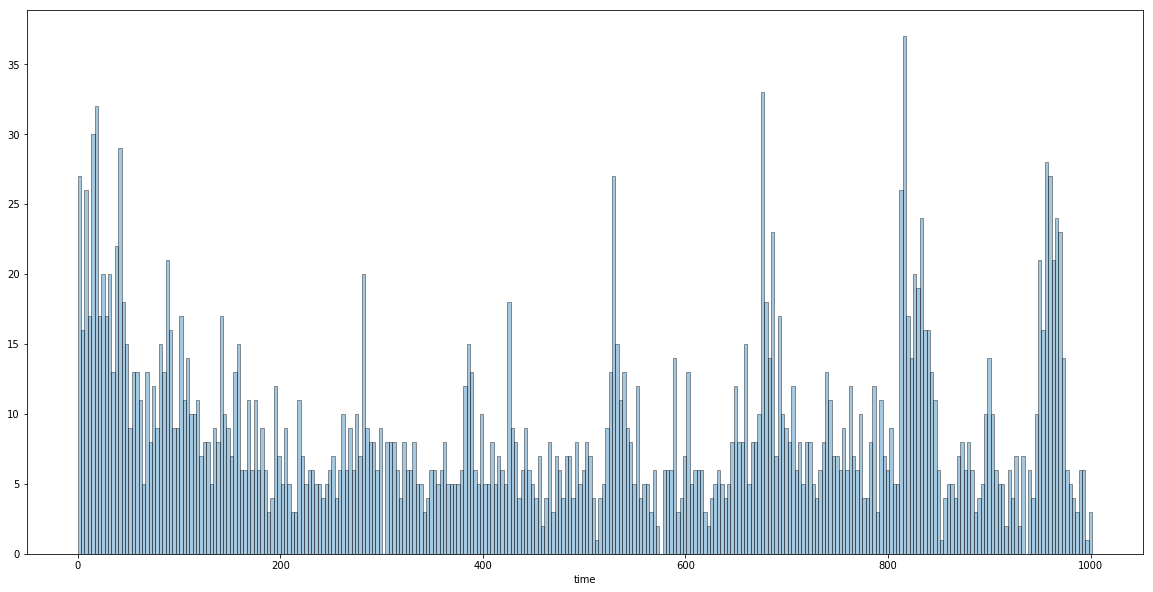

In [21]:
plt.figure(figsize=(20,10))
sns.distplot(df["time"], bins=300, kde=False)

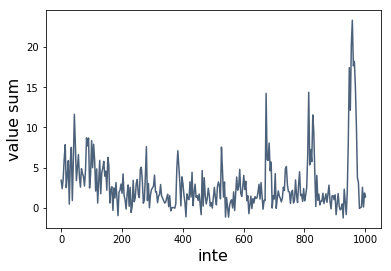

In [22]:
def getinte(value):
    numsmaller = sum(cut < value)
    left = cut[numsmaller - 1]
    right = cut[numsmaller]
    return left

timearray = df["time"].tolist()
textarray = df["text"].tolist()
valuearray = df["value"].tolist()
cut = np.linspace(min(timearray), max(timearray), 301, endpoint = True)
dstable = Table().with_column("time", timearray).with_column("text", textarray).with_column("value", valuearray)
b = dstable.apply(getinte, "time")
dstable = dstable.with_column("inte", b).group("inte", sum)
dstable.plot("inte", "value sum")

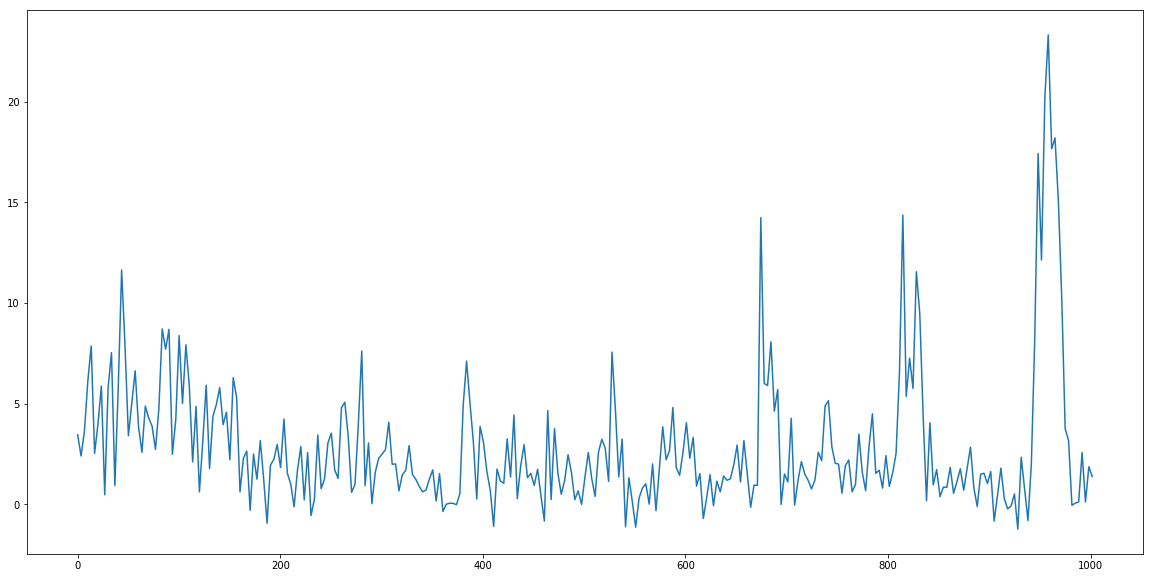

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(dstable.column("inte"), dstable.column("value sum"))

In [29]:
video_length = round(max(timearray))

def convert_to_interval_table(pdtable, binsnum, bin_in_interval):
    timearray = pdtable["time"].tolist()
    valuearray = pdtable["value"].tolist()
    cutpoints = np.linspace(min(timearray), max(timearray), binsnum + 1, endpoint = True)
    table = Table().with_column("time interval", []).with_column("value", [])
    for index in np.arange(len(timearray)):
        numsmaller = sum(cutpoints < timearray[index])
        value = valuearray[index]
        for i in np.arange(bin_in_interval):
            if (binsnum >= numsmaller - 1 + bin_in_interval - i) and (0 <= numsmaller - i):
                table.append([str(cutpoints[numsmaller - i]) + "," + str(cutpoints[numsmaller + bin_in_interval - i - 1]), value])
    return table.group("time interval", sum).sort("value sum", True)
        
def gettopintervals(pdtable, clipnum):
    intearray = pdtable.column(0)
    cur_i = 0
    result_intervals = []
    while (clipnum > 0 and cur_i < pdtable.num_rows):
        thisinte = intearray[cur_i]
        thisleft = convert(thisinte)[0]
        thisright = convert(thisinte)[1]
        exist = False
        for inte in result_intervals:
            conv = convert(inte)
            if (conv[0] < thisright and conv[0] > thisleft) or (conv[1] < thisright and conv[1] > thisleft):
                exist = True
        if not exist:
            result_intervals.append(thisinte)
            clipnum -= 1
        cur_i += 1
    return result_intervals
        
def convert(strarray):
    array = strarray.split(",")
    return [float(array[0]), float(array[1])]
a = convert_to_interval_table(df, video_length, 11)

In [31]:
gettopintervals(a, 10)

['957.5410778443114,967.5362874251497',
 '947.545868263473,957.5410778443114',
 '967.5362874251497,977.5314970059881',
 '675.6761676646706,685.671377245509',
 '814.6095808383234,824.6047904191616',
 '824.6047904191616,834.6',
 '41.97988023952096,51.97508982035928',
 '83.95976047904192,93.95497005988024',
 '100.95161676646707,110.94682634730539',
 '7.996167664670659,17.991377245508982']